In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
file ='data/singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv'
data = pd.read_csv(file)

In [3]:
data.head()

year          level_1        level_2   value
0  1957  Total Residents  0  -  4 Years  264727
1  1957  Total Residents  5  -  9 Years  218097
2  1957  Total Residents  10 - 14 Years  136280
3  1957  Total Residents  15 - 19 Years  135679
4  1957  Total Residents  20 - 24 Years  119266

In [4]:
# change col names

In [5]:
data.rename(columns = {'level_1':'Ethnic_gender', 
                       'level_2':'Age_group'},inplace =True)
data.head()

year    Ethnic_gender      Age_group   value
0  1957  Total Residents  0  -  4 Years  264727
1  1957  Total Residents  5  -  9 Years  218097
2  1957  Total Residents  10 - 14 Years  136280
3  1957  Total Residents  15 - 19 Years  135679
4  1957  Total Residents  20 - 24 Years  119266

In [6]:
data.Ethnic_gender.unique()

array(['Total Residents', 'Total Male Residents',
       'Total Female Residents', 'Total Malays', 'Total Male Malays',
       'Total Female Malays', 'Total Chinese', 'Total Male Chinese',
       'Total Female Chinese', 'Total Indians', 'Total Male Indians',
       'Total Female Indians', 'Other Ethnic Groups (Total)',
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)'],
      dtype=object)

In [7]:
m_f = {}
# N total
# M male 
# F Female

In [8]:
for i in data.Ethnic_gender.unique():
    print(f"""  '{i}':'M', """)

  'Total Residents':'M', 
  'Total Male Residents':'M', 
  'Total Female Residents':'M', 
  'Total Malays':'M', 
  'Total Male Malays':'M', 
  'Total Female Malays':'M', 
  'Total Chinese':'M', 
  'Total Male Chinese':'M', 
  'Total Female Chinese':'M', 
  'Total Indians':'M', 
  'Total Male Indians':'M', 
  'Total Female Indians':'M', 
  'Other Ethnic Groups (Total)':'M', 
  'Other Ethnic Groups (Males)':'M', 
  'Other Ethnic Groups (Females)':'M', 


In [9]:
m_f = {
    'Total Residents':'N', 
  'Total Male Residents':'M', 
  'Total Female Residents':'F', 
  'Total Malays':'N', 
  'Total Male Malays':'M', 
  'Total Female Malays':'F', 
  'Total Chinese':'N', 
  'Total Male Chinese':'M', 
  'Total Female Chinese':'F', 
  'Total Indians':'N', 
  'Total Male Indians':'M', 
  'Total Female Indians':'F', 
  'Other Ethnic Groups (Total)':'N', 
  'Other Ethnic Groups (Males)':'M', 
  'Other Ethnic Groups (Females)':'F'
}

In [10]:
data['gender'] = data['Ethnic_gender'].apply(lambda x: m_f[x] ) 
data.head()

year    Ethnic_gender      Age_group   value gender
0  1957  Total Residents  0  -  4 Years  264727      N
1  1957  Total Residents  5  -  9 Years  218097      N
2  1957  Total Residents  10 - 14 Years  136280      N
3  1957  Total Residents  15 - 19 Years  135679      N
4  1957  Total Residents  20 - 24 Years  119266      N

In [11]:
# check data type

In [12]:
data.dtypes

year              int64
Ethnic_gender    object
Age_group        object
value            object
gender           object
dtype: object

## check null vlaues

In [13]:
data.isna().sum()

year             0
Ethnic_gender    0
Age_group        0
value            0
gender           0
dtype: int64

In [14]:
print(sum(data.values =='na'))

[   0    0    0 2460    0]


In [15]:
len(data.groupby(by =['year','Ethnic_gender'])['value'].count().index)

930

/home/negi/anaconda3/envs/torch/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



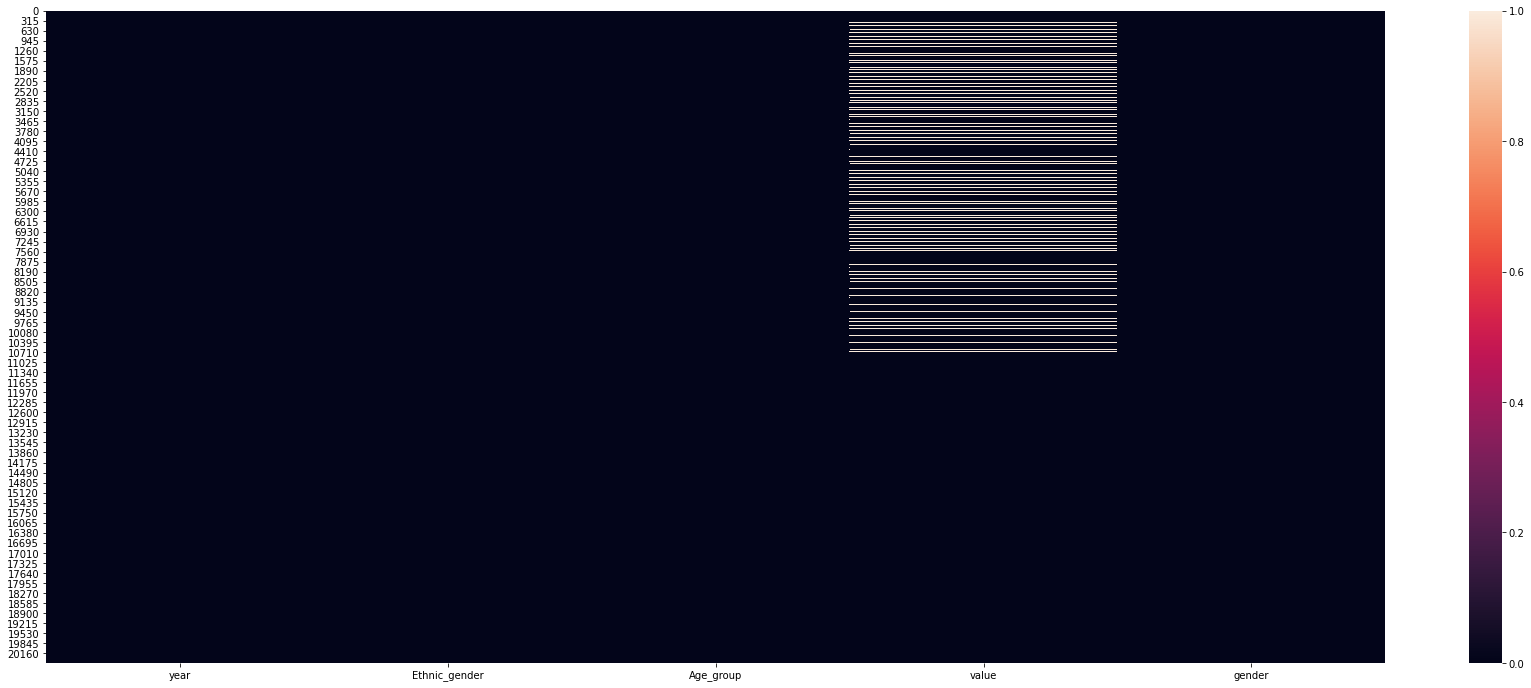

In [16]:
plt.figure(figsize =(30,12))
sns.heatmap(data =='na',
           )

In [17]:
missing_values = data.iloc[data['value'].values =='na'].reset_index(drop = 'index')

In [18]:
missing_values.head()

year    Ethnic_gender        Age_group value gender
0  1958  Total Residents    70 - 74 Years    na      N
1  1958  Total Residents    75 - 79 Years    na      N
2  1958  Total Residents    80 - 84 Years    na      N
3  1958  Total Residents  75 Years & Over    na      N
4  1958  Total Residents  80 Years & Over    na      N

## removing missing rows

In [19]:
data = data.iloc[~(data['value'].values =='na')].reset_index(drop=True)

In [20]:
data.iloc[data['value'].values =='na']

Empty DataFrame
Columns: [year, Ethnic_gender, Age_group, value, gender]
Index: []

In [21]:
data.value  = data.value.astype('int')

In [22]:
np.unique(data.year.values)

array([1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [23]:
unique_Age_group =np.unique(data.Age_group.values)

print("No of unique_Age_group ", len(unique_Age_group))
print(unique_Age_group)

No of unique_Age_group  22
['0  -  4 Years' '10 - 14 Years' '15 - 19 Years' '20 - 24 Years'
 '25 - 29 Years' '30 - 34 Years' '35 - 39 Years' '40 - 44 Years'
 '45 - 49 Years' '5  -  9 Years' '50 - 54 Years' '55 - 59 Years'
 '60 - 64 Years' '65 - 69 Years' '65 Years & Over' '70 - 74 Years'
 '70 Years & Over' '75 - 79 Years' '75 Years & Over' '80 - 84 Years'
 '80 Years & Over' '85 Years & Over']


In [24]:
unique_Ethnic_gender =np.unique(data.Ethnic_gender.values)

print("No of unique_Ethnic_gender ", len(unique_Ethnic_gender))
print(unique_Ethnic_gender)

No of unique_Ethnic_gender  15
['Other Ethnic Groups (Females)' 'Other Ethnic Groups (Males)'
 'Other Ethnic Groups (Total)' 'Total Chinese' 'Total Female Chinese'
 'Total Female Indians' 'Total Female Malays' 'Total Female Residents'
 'Total Indians' 'Total Malays' 'Total Male Chinese' 'Total Male Indians'
 'Total Male Malays' 'Total Male Residents' 'Total Residents']


# Total Residents is largest Ethnic_group in singapur



1. >  **largest Ethnic group in Singapore** : Total Residents  
2. >  **what proportion of the total population do they constitute** :: 50 %  
3. >  **average population growth over the years** ::   0.02055817990465972


In [25]:
def largest_group(data,value):
    return data.groupby(by =value)['value'].sum().sort_values( ascending=False)
    
    

In [26]:
Ethnic_group = largest_group(data[data['gender']=='N'],'Ethnic_gender')
Ethnic_group

Ethnic_gender
Total Residents                192175418
Total Chinese                  148157861
Total Malays                    25814830
Total Indians                   14563406
Other Ethnic Groups (Total)      3639417
Name: value, dtype: int64

In [27]:
fig = px.pie(values=Ethnic_group.values, names=Ethnic_group.index, 
             title='Population by ethnicity')
fig.show()

In [28]:
print('what proportion of the total population do they constitute ::50 %')

what proportion of the total population do they constitute ::50 %


In [29]:
growth_data = data[(data['Ethnic_gender'] == Ethnic_group.index[0])]
growth_data = growth_data.groupby(by=['year'])['value'].sum().pct_change()

fig = px.line(y =growth_data.values,
              x =growth_data.index,
              title=f"Growth rate yearly  For {Ethnic_group.index[0]}"
             
             )

fig.show()

In [30]:
print('average population growth over the years :: ', growth_data.values[1:].mean())


average population growth over the years ::  0.02055817990465972


In [31]:
# growth rate by age 

growth rate by age for  Total Residents


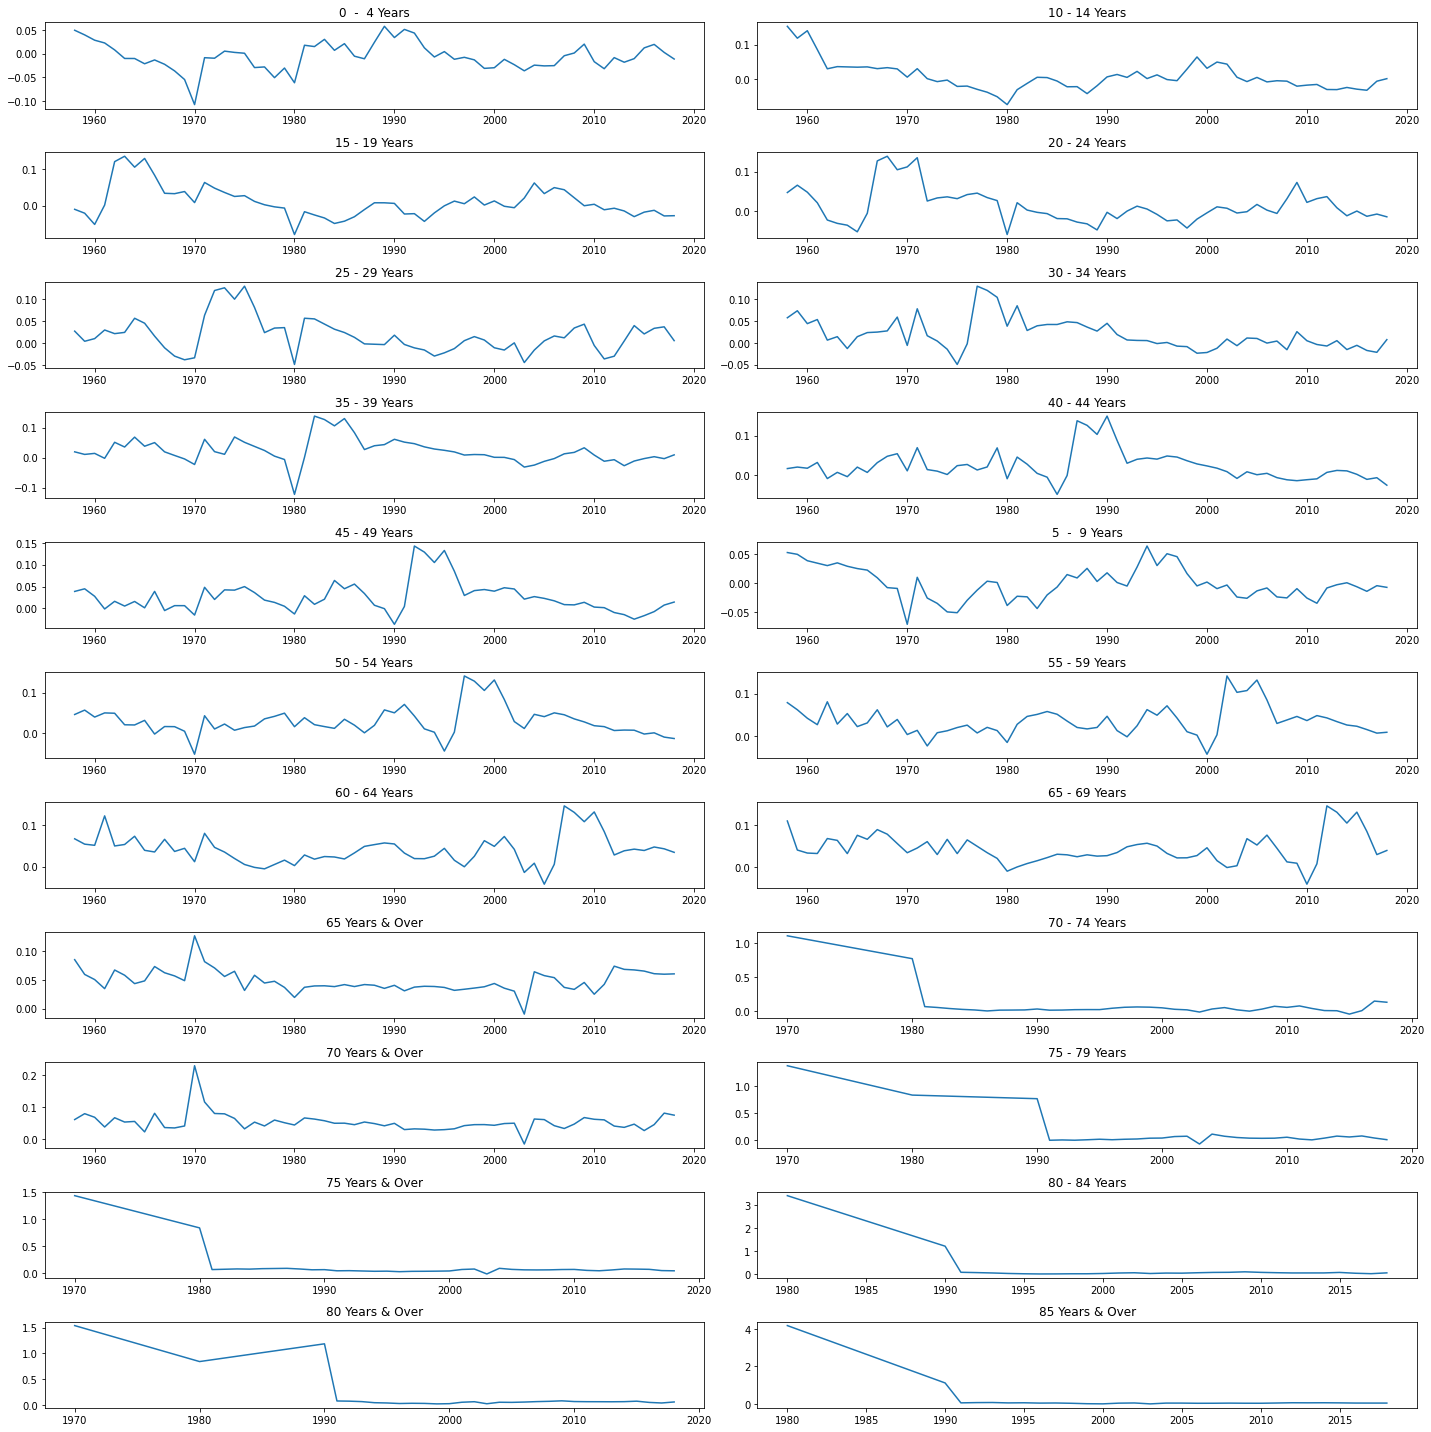

In [32]:
print('growth rate by age for ' ,Ethnic_group.index[0])
fig, ax = plt.subplots(nrows=11, ncols=2, figsize =(20,20))
growth_rate = []
growth_data = data[(data['Ethnic_gender'] == Ethnic_group.index[0])]
for i,age_g_2 in enumerate(unique_Age_group.reshape(11,2)):
    for j, age_g_2_1 in enumerate(age_g_2):
        growth_data_by_Age_group =growth_data[(growth_data['Age_group'] == age_g_2_1)].groupby(
                                    by=['year'])['value'].sum().pct_change()

        y = growth_data_by_Age_group.values
        growth_rate.append((y[1:].mean(),age_g_2_1))
        x = growth_data_by_Age_group.index
        
        ax[i,j].plot( x,y)
        ax[i,j].set_title(age_g_2_1)
        
plt.tight_layout()
plt.show()

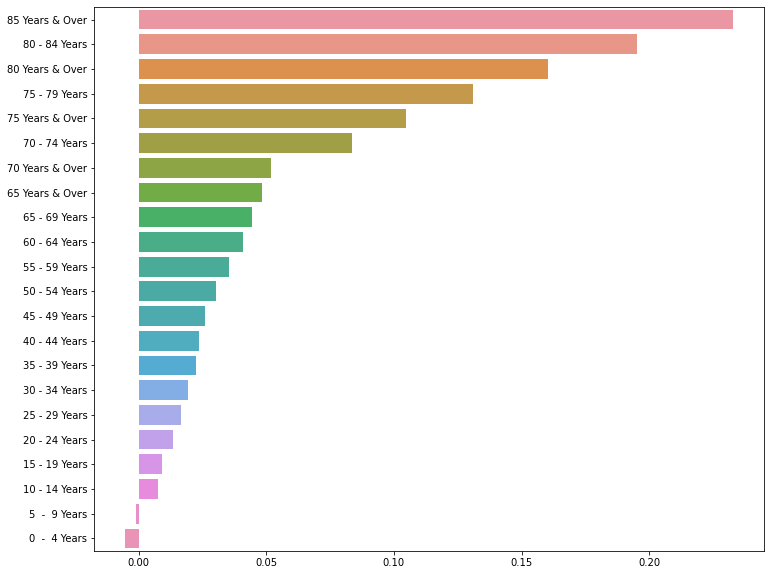

In [33]:
    """ insight 

    Life expectancy incresed and 
    decrease in number of new born child 
    

    """
plt.figure(figsize=(12,10))
growth_rate.sort(key = lambda x : x[0],reverse=True)
x, y = zip(*(growth_rate))
sns.barplot(y=list(y),
            x=list(x))


## Identify the largest age group in Singapore


#### Their average population growth over the years and what proportion of the total population do they constitute.

1. >  **largest age group in Singapore** ::  5  -  9 Years
2. >  **what proportion of the total population do they constitute** :: 7.56 %  
3. >  **average population growth over the years** ::   -0.0011038524078855348

In [34]:
Ethnic_groups_name = [i[0] for i in m_f.items() if i[1] == 'N']
Ethnic_groups_name

['Total Residents',
 'Total Malays',
 'Total Chinese',
 'Total Indians',
 'Other Ethnic Groups (Total)']

In [35]:
Ethnic_groups =data[data['gender'] == 'N']
Ethnic_groups

year                Ethnic_gender        Age_group   value gender
0      1957              Total Residents    0  -  4 Years  264727      N
1      1957              Total Residents    5  -  9 Years  218097      N
2      1957              Total Residents    10 - 14 Years  136280      N
3      1957              Total Residents    15 - 19 Years  135679      N
4      1957              Total Residents    20 - 24 Years  119266      N
...     ...                          ...              ...     ...    ...
17951  2018  Other Ethnic Groups (Total)  65 Years & Over    7362      N
17952  2018  Other Ethnic Groups (Total)  70 Years & Over    4297      N
17953  2018  Other Ethnic Groups (Total)  75 Years & Over    2505      N
17954  2018  Other Ethnic Groups (Total)  80 Years & Over    1456      N
17955  2018  Other Ethnic Groups (Total)  85 Years & Over     718      N

[6000 rows x 5 columns]

In [36]:
Age_group = largest_group(Ethnic_groups, 'Age_group')
Age_group

Age_group
5  -  9 Years      29038091
10 - 14 Years      28919480
0  -  4 Years      28167443
15 - 19 Years      28150508
25 - 29 Years      28073703
30 - 34 Years      27844225
20 - 24 Years      27539353
35 - 39 Years      26467609
40 - 44 Years      24300080
65 Years & Over    22873401
45 - 49 Years      21657424
50 - 54 Years      18698770
55 - 59 Years      15375484
70 Years & Over    14037159
60 - 64 Years      11994138
65 - 69 Years       8836242
75 Years & Over     7265131
70 - 74 Years       5321428
80 Years & Over     3324134
75 - 79 Years       3156515
80 - 84 Years       1880510
85 Years & Over     1430104
Name: value, dtype: int64

In [37]:
# 5  -  9 Years largest
fig = px.pie(values=Age_group.values, names=Age_group.index, 
             title='Population by Age')
fig.show()

In [38]:
growth_data = data[(data['Age_group'] == Age_group.index[0])]
growth_data = growth_data.groupby(by=['year'])['value'].sum().pct_change()

fig = px.line(y =growth_data.values,
              x =growth_data.index,
              title=f"Growth rate yearly  For {Age_group.index[0]}"
             
             )
fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [39]:
print(growth_data.values[1:].mean())

-0.0011038524078855348


In [40]:
# growth rate by age 

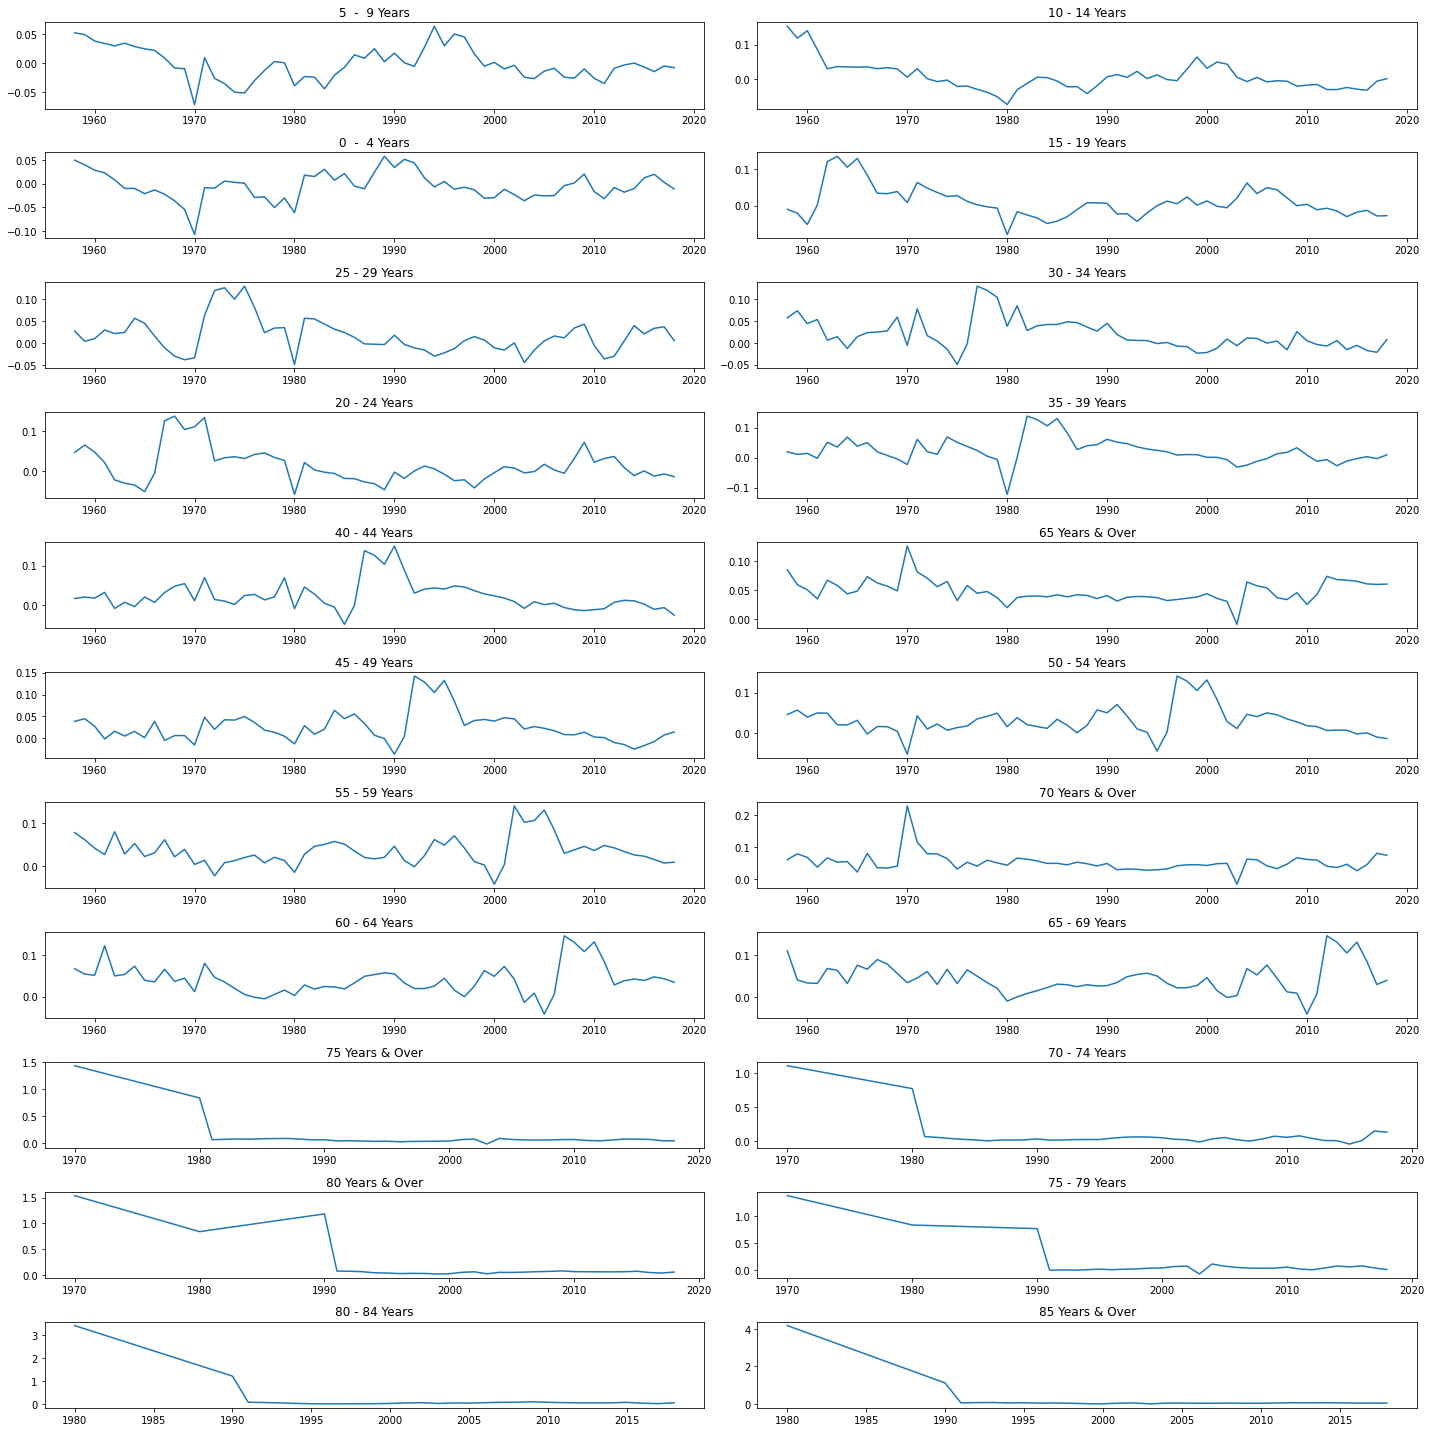

In [41]:
growth_rate = []
fig, ax = plt.subplots(nrows=11, ncols=2, figsize =(20,20))
growth_data = Ethnic_groups
for i,u_l_2_c in enumerate(np.array(Age_group.index).reshape(11,2)):
    for j, u_l_2 in enumerate(u_l_2_c):
        growth_data_by_level_2 =growth_data[(growth_data['Age_group'] == u_l_2)].groupby(
                                    by=['year'])['value'].sum().pct_change()

        y = growth_data_by_level_2.values
        x = growth_data_by_level_2.index
        growth_rate.append((y[1:].mean(),u_l_2))
        
        
        ax[i,j].plot( x,y)
        ax[i,j].set_title(u_l_2)
        
plt.tight_layout()
plt.show()

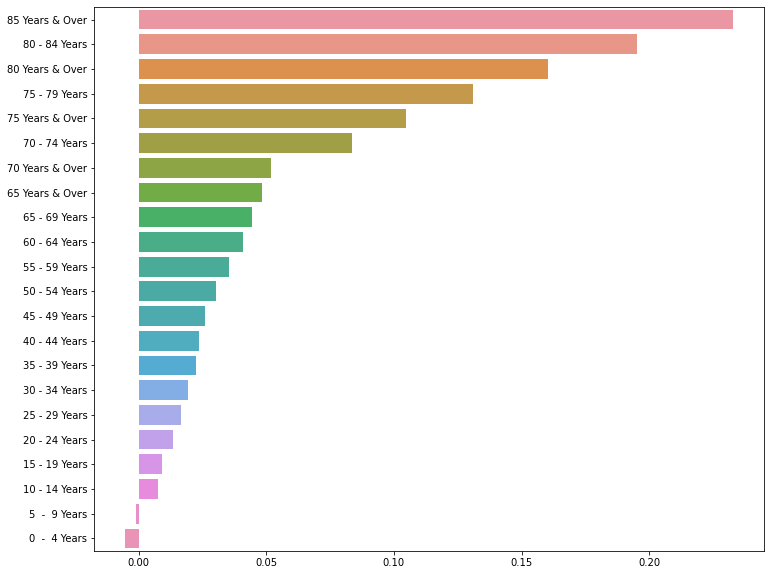

In [42]:
""" insight 

Life expectancy increse and 
decrease in number of new born child 

"""

plt.figure(figsize=(12,10))
growth_rate.sort(key = lambda x : x[0],reverse=True)
x, y = zip(*(growth_rate))
sns.barplot(y=list(y),
            x=list(x))

## Identify the group (by age, ethnicity and gender) that:



1.  >  **Has shown the highest growth rate** ::  (0.4044422424858464, 'Total Male Chinese85 Years & Over')
2.  >  **Has shown the lowest growth rate** :: (-0.007212427829619562, 'Total Male Chinese 0  -  4 Years')  
3.  >  **Has remained the sames** :: appox estimatimation (0.0013961680698216085, 'Total Female Malays 5  -  9 Years')


In [43]:
eth_age_gen = data[~(data['gender']=='N')]
eth_age_gen

year                  Ethnic_gender        Age_group   value gender
22     1957           Total Male Residents    0  -  4 Years  136712      M
23     1957           Total Male Residents    5  -  9 Years  112030      M
24     1957           Total Male Residents    10 - 14 Years   71219      M
25     1957           Total Male Residents    15 - 19 Years   70137      M
26     1957           Total Male Residents    20 - 24 Years   61254      M
...     ...                            ...              ...     ...    ...
17995  2018  Other Ethnic Groups (Females)  65 Years & Over    3386      F
17996  2018  Other Ethnic Groups (Females)  70 Years & Over    2087      F
17997  2018  Other Ethnic Groups (Females)  75 Years & Over    1362      F
17998  2018  Other Ethnic Groups (Females)  80 Years & Over     842      F
17999  2018  Other Ethnic Groups (Females)  85 Years & Over     437      F

[12000 rows x 5 columns]

In [44]:
eth_age_gen.Ethnic_gender.unique()

array(['Total Male Residents', 'Total Female Residents',
       'Total Male Malays', 'Total Female Malays', 'Total Male Chinese',
       'Total Female Chinese', 'Total Male Indians',
       'Total Female Indians', 'Other Ethnic Groups (Males)',
       'Other Ethnic Groups (Females)'], dtype=object)

In [45]:
""" 220 unique index"""
eth_age_gen.groupby(by = ['Ethnic_gender','Age_group'])['year'].count()

Ethnic_gender                  Age_group      
Other Ethnic Groups (Females)  0  -  4 Years      62
                               10 - 14 Years      62
                               15 - 19 Years      62
                               20 - 24 Years      62
                               25 - 29 Years      62
                                                  ..
Total Male Residents           75 - 79 Years      32
                               75 Years & Over    41
                               80 - 84 Years      31
                               80 Years & Over    32
                               85 Years & Over    31
Name: year, Length: 220, dtype: int64

In [46]:
growth_rate = [] # value and group
for i,group_i in enumerate(eth_age_gen.groupby(by = ['Ethnic_gender','Age_group'])['value','year']):
    growth_rate.append((group_i[1]['value'].pct_change()[1:].values.mean(),
                  ''.join(group_i[0])
                  ))

growth_rate.sort(key=lambda x: x[0],reverse=True)
print('highest growth rate :', growth_rate[0])
print('lowest growth rate :', growth_rate[-1])
print('remained growth same (Almost) :', [i for i in growth_rate if i[0]>=0][-1])

highest growth rate : (0.4044422424858464, 'Total Male Chinese85 Years & Over')
lowest growth rate : (-0.007212427829619562, 'Total Male Chinese0  -  4 Years')
remained growth same (Almost) : (0.0013961680698216085, 'Total Female Malays5  -  9 Years')


<ipython-input-46-04756cff93bb>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



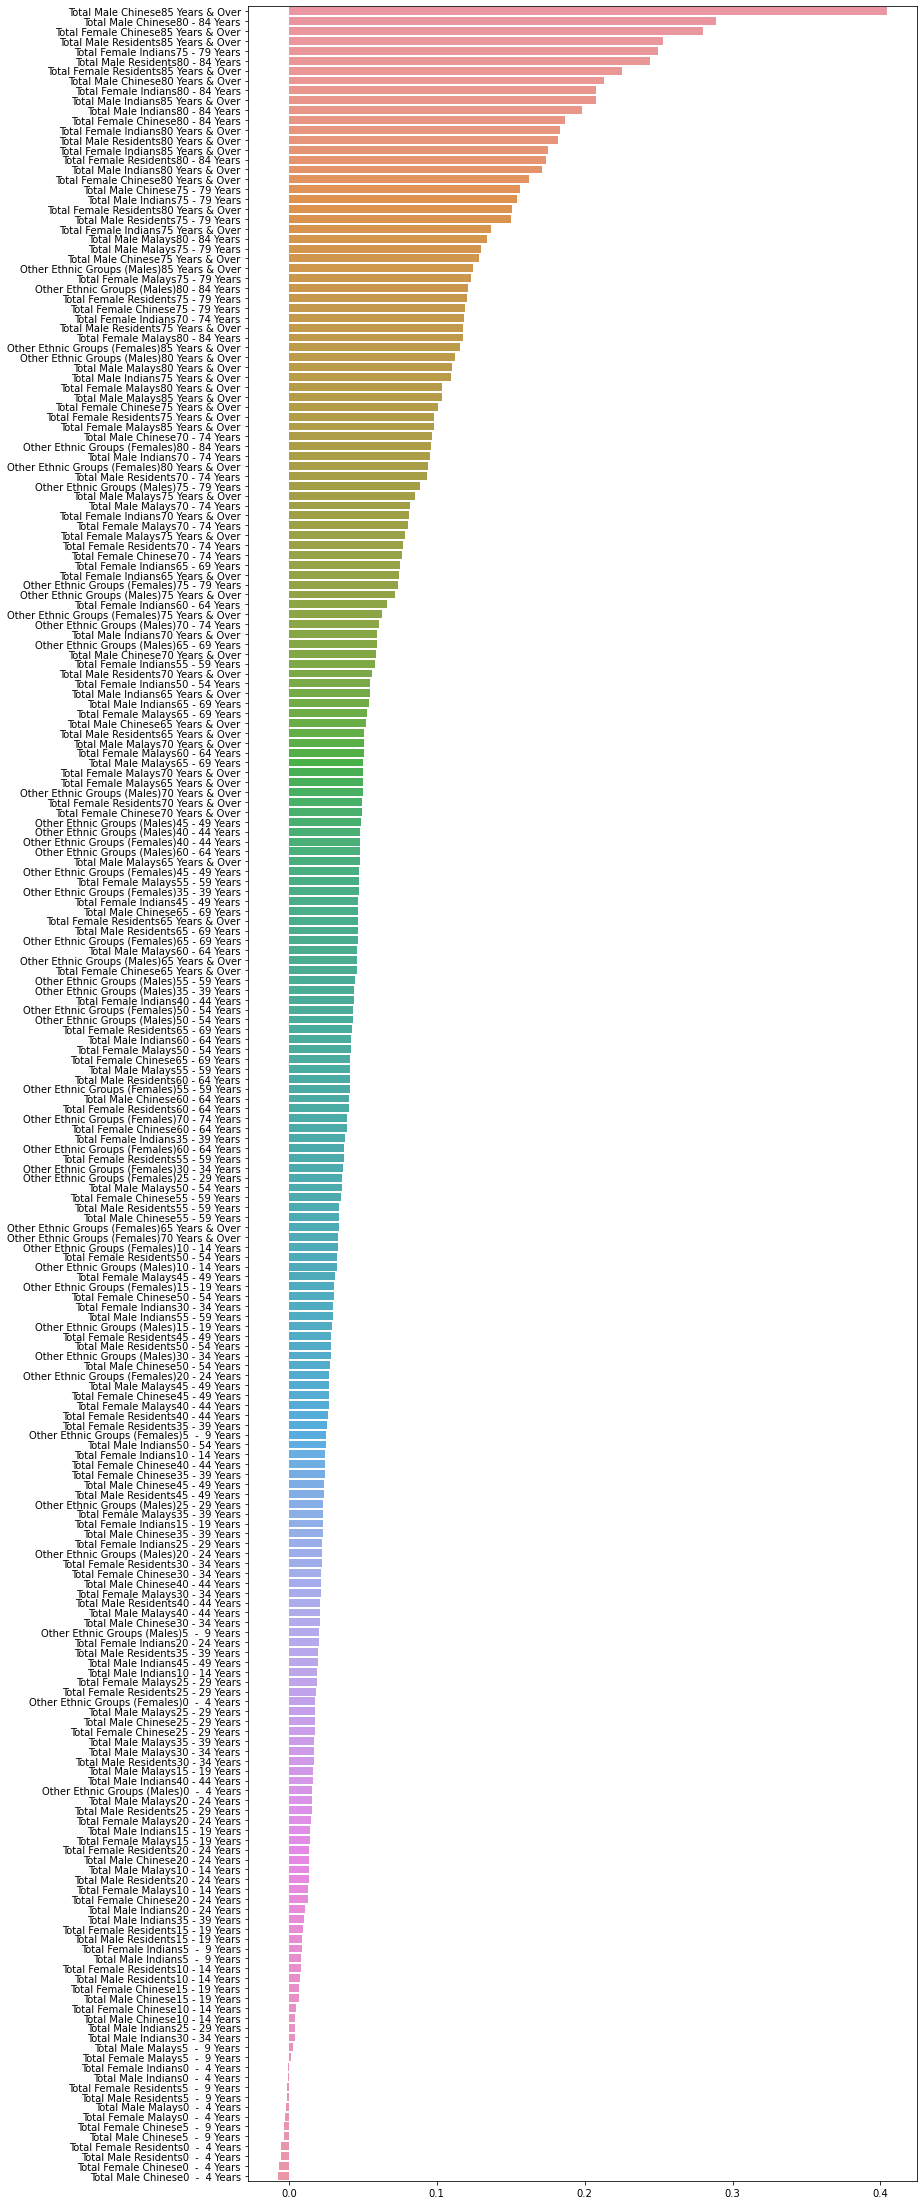

In [47]:
plt.figure(figsize=(12,40))
growth_rate.sort(key = lambda x : x[0],reverse=True)
x, y = zip(*(growth_rate))
sns.barplot(y=list(y),
            x=list(x))

# Plot a graph for population trends

### by Ethenity  population growth

In [48]:
trends = data[data['gender'] == 'N'] 

In [49]:
trends.head(1)

year    Ethnic_gender      Age_group   value gender
0  1957  Total Residents  0  -  4 Years  264727      N

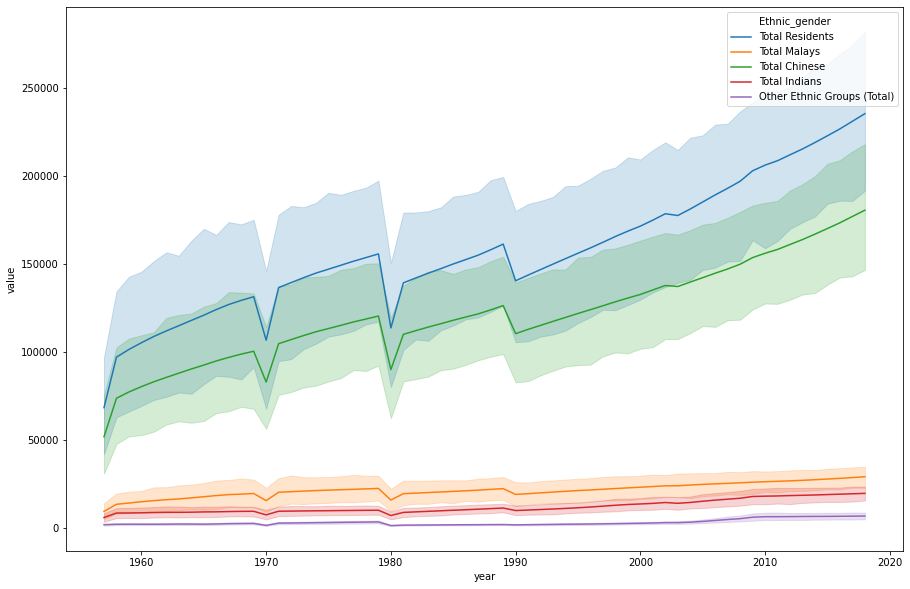

In [50]:

plt.figure(figsize=(15,10))
sns.lineplot(x ='year',
             y= 'value',
             hue ='Ethnic_gender',
             data = trends,
       )

<ipython-input-51-7f7959544d44>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



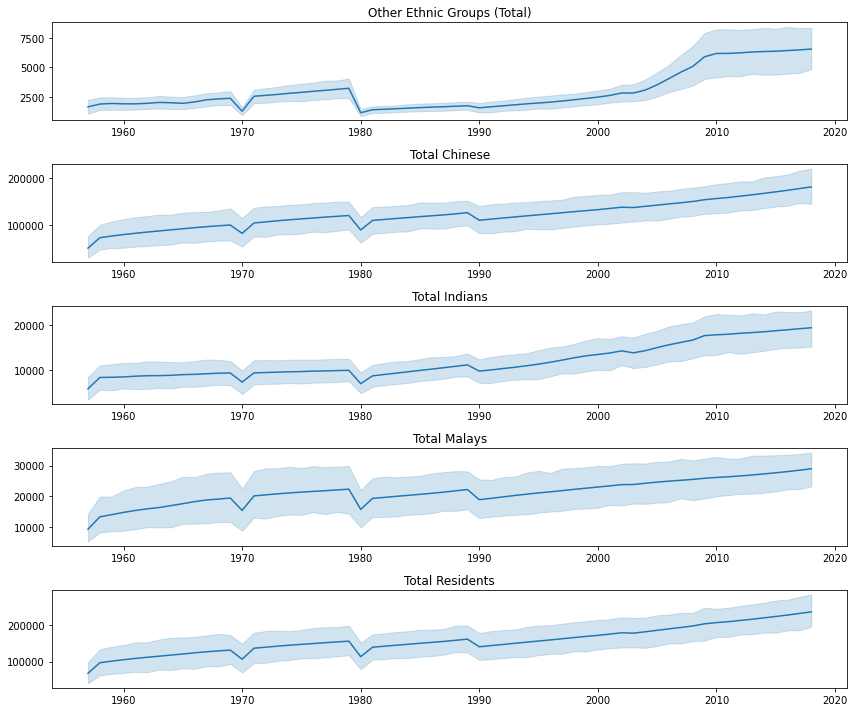

In [51]:
fig , ax = plt.subplots(nrows=5,ncols =1,figsize =(12,10))
for i,(ethenity,population_year) in enumerate(trends.groupby(by = 'Ethnic_gender')['value','year']):
    sns.lineplot(y=population_year.value.values,
                  x=population_year.year.values,ax=ax[i])
    ax[i].set_title(ethenity)
plt.tight_layout()
plt.show()

# by age

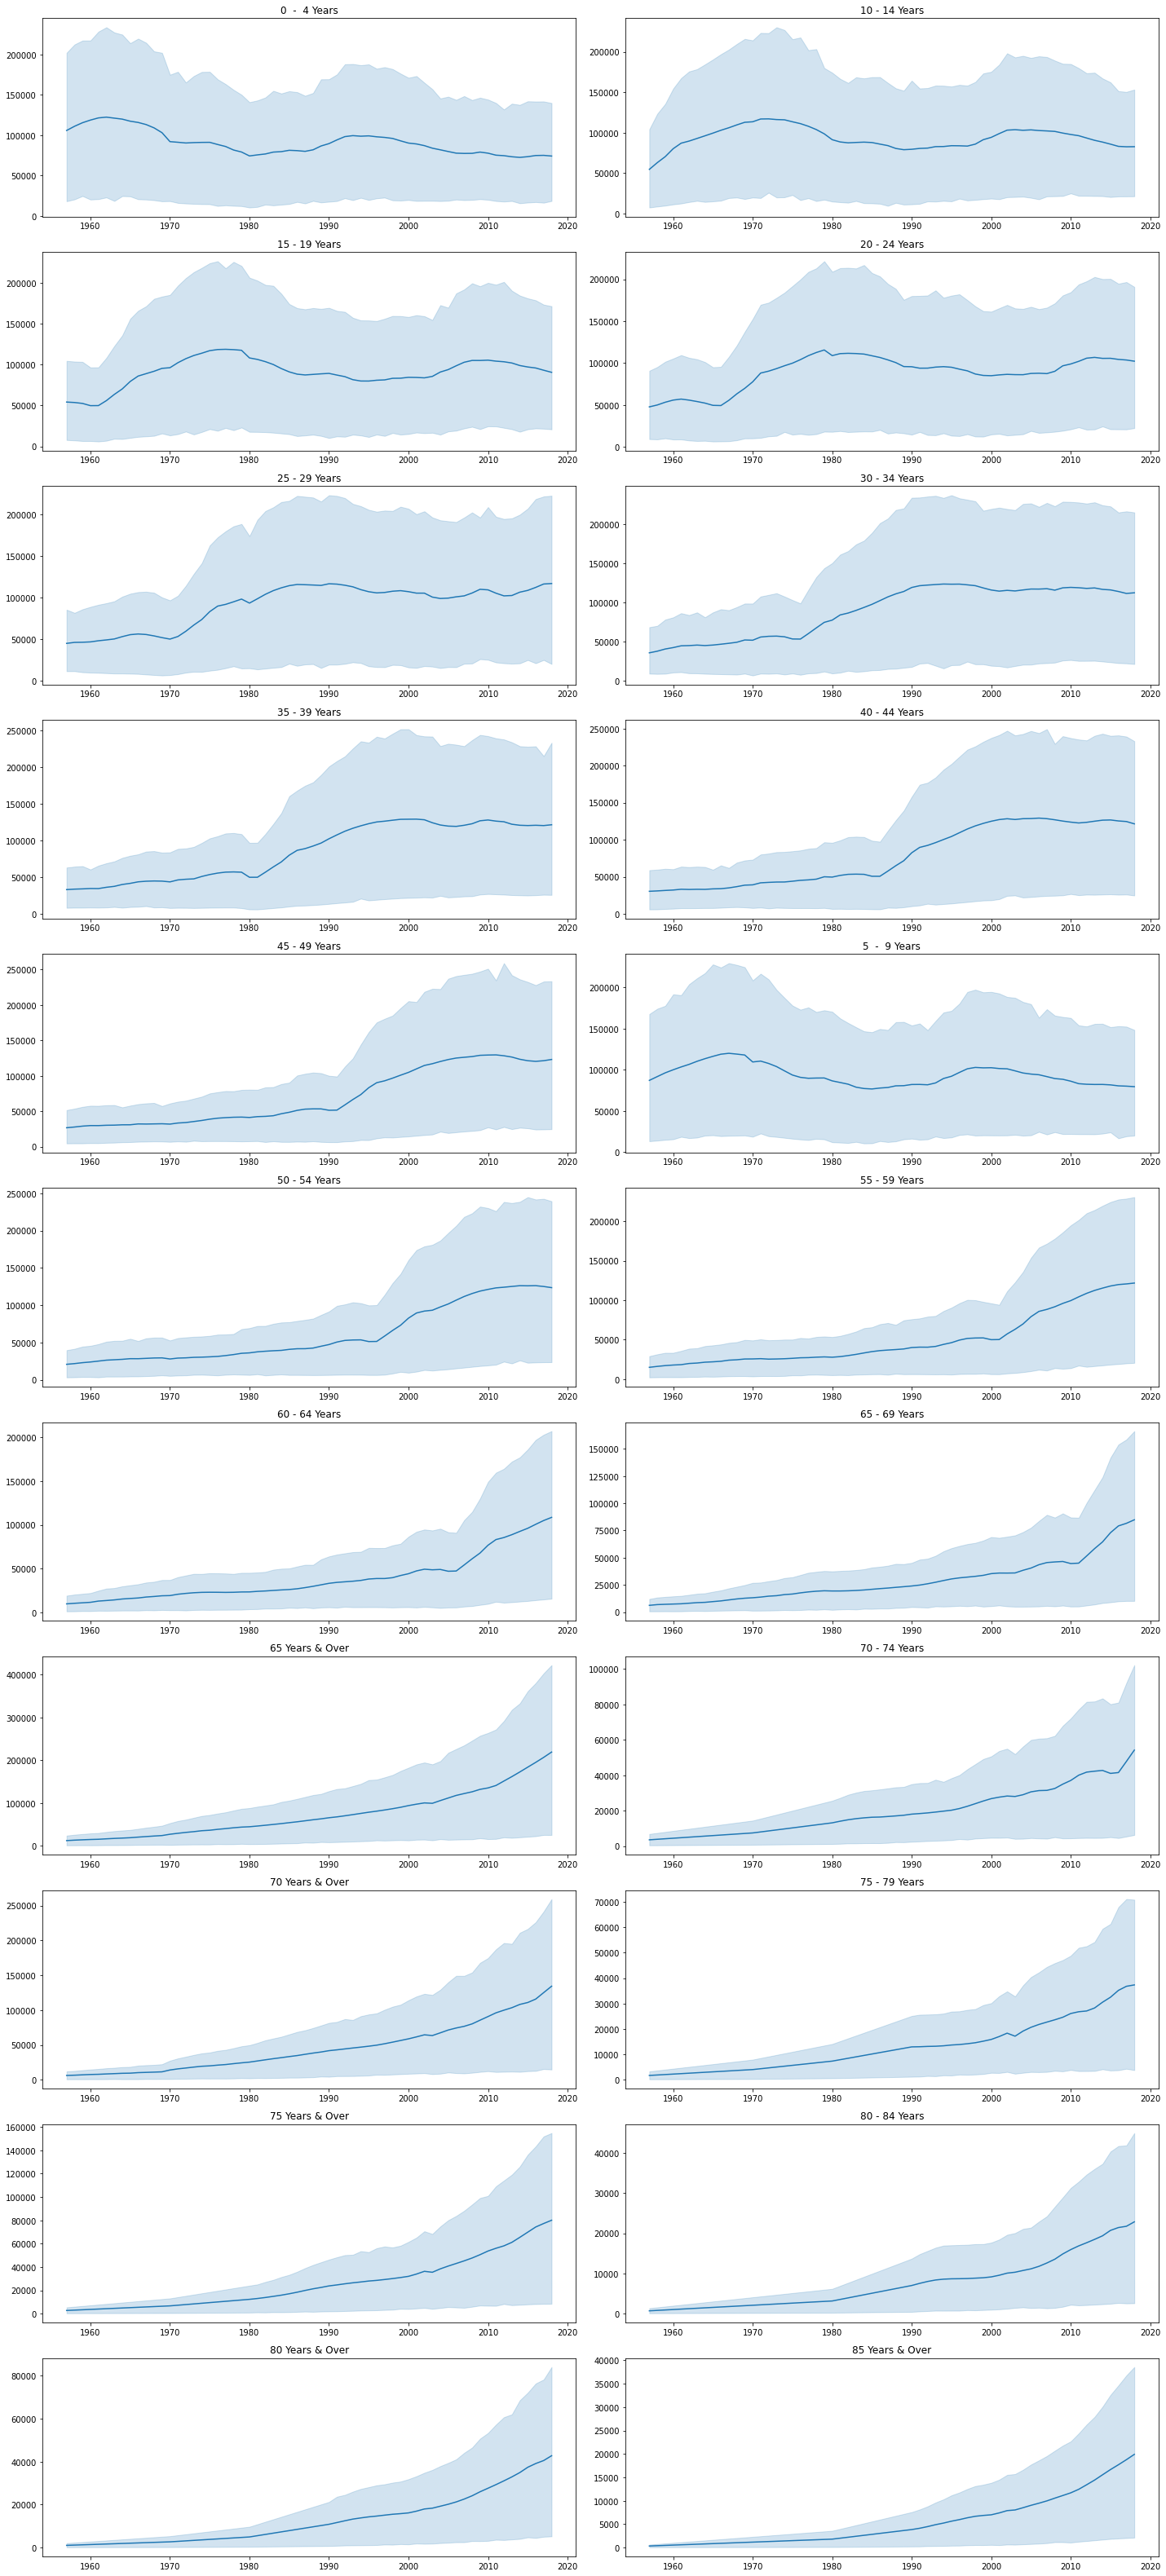

In [52]:
fig , ax = plt.subplots(nrows=11,ncols =2,figsize =(20,44))

for i,age in enumerate(unique_Age_group.reshape(11,2)):
    for j, age_i in enumerate(age):
        
        sns.lineplot(y=trends[trends['Age_group'] == age_i]['value'].values,
                     x=trends[trends['Age_group'] == age_i]['year'].values,
                      ax = ax[i,j]
                    )
        ax[i,j].set_title(age_i)

plt.tight_layout()
plt.show()


## by gender

In [53]:
trends = data[~(data['gender']=='N')]

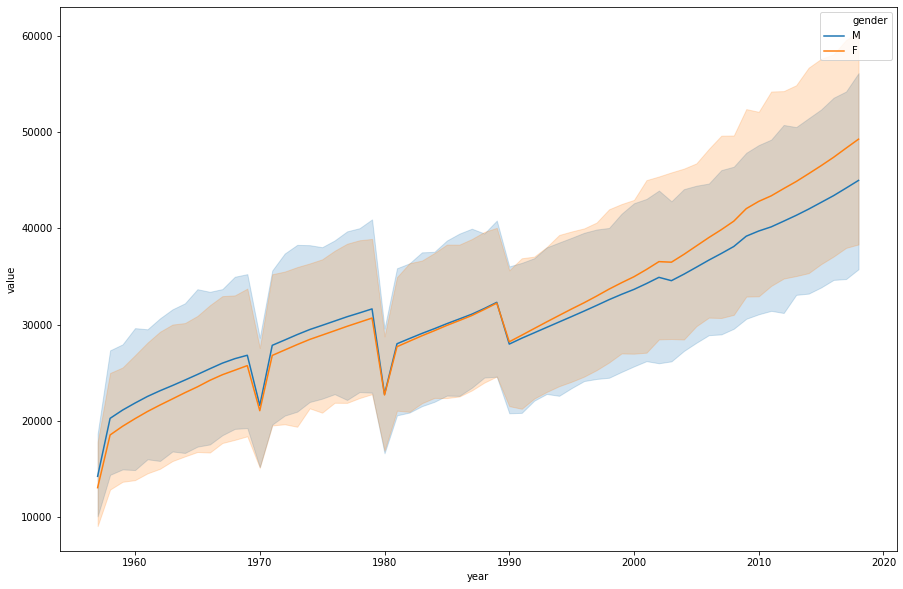

In [54]:
plt.figure(figsize=(15,10))
sns.lineplot(x ='year',
             y= 'value',
             hue ='gender',
             data = trends,
       )

In [55]:
#checking growth rate 

In [56]:
trends = data[~(data['gender']=='N')]

In [57]:
growth_rate_m = trends[trends['gender']=='M'].groupby('year').sum().pct_change()[1:]
growth_rate_f = trends[trends['gender']=='F'].groupby('year').sum().pct_change()[1:]

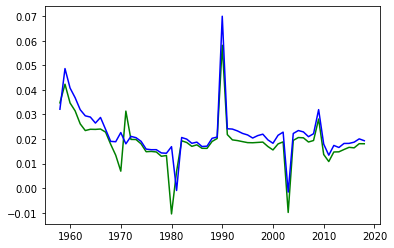

In [58]:
sns.lineplot(y =growth_rate_m.value.values,
             x = list(growth_rate_m.index.values),
             color='g'
             
            )
sns.lineplot(y =growth_rate_f.value.values,
             x = list(growth_rate_f.index.values),
             color='b'
             
            )
